# Predicting NCAAW 2025 March Madness Winner

In [45]:
# Importing the packages
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
from io import StringIO  # Import StringIO
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [46]:
# Scraping the web for URL of NCCAW 2024 stats
url = "https://www.sports-reference.com/cbb/seasons/women/2024-school-stats.html"

# Fetch the website
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

In [47]:
# Find the table (check the site's HTML structure
table = soup.find("table", {"id": "basic_school_stats"})

In [48]:
# Convert the table to a DataFrame
table_html = str(table)
table_io = StringIO(table_html)

In [49]:
# Use read_html correctly
data_set = pd.read_html(table_io)[0]

In [50]:
# Save to CSV
data_set.to_csv("NCAAW_2024_Analytic.csv", index=False)
print("CSV file saved!")

CSV file saved!


In [51]:
df = pd.read_csv("NCAAW_2024_Analytic.csv")
df

,Unnamed: 0_level_0,Unnamed: 1_level_0,Overall,Overall.1,Overall.2,Overall.3,Overall.4,Overall.5,Unnamed: 8_level_0,Conf.,Conf..1,Unnamed: 11_level_0,Home,Home.1,Unnamed: 14_level_0,Away,Away.1,Unnamed: 17_level_0,Points,Points.1,Unnamed: 20_level_0,Totals,Totals.1,Totals.2,Totals.3,Totals.4,Totals.5,Totals.6,Totals.7,Totals.8,Totals.9,Totals.10,Totals.11,Totals.12,Totals.13,Totals.14,Totals.15,Totals.16
0,Rk,School,G,W,L,W-L%,SRS,SOS,Unnamed: 8_level_1,W,L,Unnamed: 11_level_1,W,L,Unnamed: 14_level_1,W,L,Unnamed: 17_level_1,Tm.,Opp.,Unnamed: 20_level_1,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,TRB,AST,STL,BLK,TOV,PF
1,1,Abilene Christian,30,14,16,.467,-3.76,-5.42,NaN,10,10,NaN,11,4,NaN,3,10,NaN,2098,1984,NaN,1215,739,1799,.411,258,847,.305,362,504,.718,392,1141,427,230,54,482,491
2,2,Air Force,32,15,17,.469,-3.45,0.25,NaN,8,10,NaN,10,6,NaN,5,8,NaN,2025,2121,NaN,1285,750,1963,.382,205,660,.311,320,425,.753,368,1031,396,347,71,473,604
3,3,Akron,29,11,18,.379,-9.42,-5.63,NaN,6,12,NaN,5,8,NaN,5,9,NaN,1807,1917,NaN,1190,656,1693,.387,172,590,.292,323,449,.719,351,1064,355,175,75,472,454
4,4,Alabama NCAA,34,24,10,.706,21.78,10.84,NaN,10,6,NaN,15,3,NaN,6,5,NaN,2487,2115,NaN,1360,892,2054,.434,249,711,.350,454,638,.712,451,1322,441,286,153,512,535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,356,Wright State,33,18,15,.545,-4.46,-1.85,NaN,11,9,NaN,11,5,NaN,6,8,NaN,2316,2336,NaN,1340,817,1970,.415,262,799,.328,420,535,.785,289,1127,450,262,134,455,539
391,357,Wyoming,33,18,15,.545,5.22,2.56,NaN,11,7,NaN,12,5,NaN,5,8,NaN,2104,1973,NaN,1324,808,1778,.454,193,647,.298,295,389,.758,252,1115,479,186,107,438,494
392,358,Xavier,28,1,27,.036,-13.59,8.34,NaN,0,18,NaN,1,12,NaN,0,13,NaN,1420,2034,NaN,1125,528,1462,.361,171,595,.287,193,285,.677,212,782,294,189,47,533,462
393,359,Yale,27,8,19,.296,-8.66,-0.95,NaN,5,9,NaN,5,8,NaN,3,11,NaN,1638,1846,NaN,1085,628,1610,.390,106,390,.272,276,407,.678,343,938,334,203,83,401,493


# Cleaning the data

In [52]:
# Renaming columns for clarity
df = df.rename(columns={
    'Unnamed: 0_level_0': 'Rank', 'Unnamed: 1_level_0': 'School', 'Overall': 'Games', 'Overall.1': 'Wins', 'Overall.2': 'Losses', 
    'Overall.3': 'Win_Percentage', 'Overall.4': 'SRS', 'Overall.5': 'SOS', 'Conf.': 'Conf_Wins',
    'Conf..1': 'Conf_Losses', 'Home': 'Home_Wins', 'Home.1': 'Home_Losses', 'Away': 'Away_Wins', 'Away.1': 'Away_Losses',
    'Points': 'Total_Points', 'Points.1': 'Opponent_Points', 'Totals': 'Mins_Played', 'Totals.1': 'Field_Goals_Made', 
    'Totals.2': 'Field_Goals_Att', 'Totals.3': 'Field_Goal_Per.', 'Totals.4': '3_Pts_Made', 'Totals.5': '3_Pts_Att',
    'Totals.6': '3_Pt_Per.', 'Totals.7': 'Free_Throws_Made', 'Totals.8': 'Free_Throws_Att', 'Totals.9': 'Free_Throw_Per.',
    'Totals.10': 'Off_Rebounds', 'Totals.11': 'Total_Rebounds', 'Totals.12': 'Assists', 'Totals.13': 'Steals', 
    'Totals.14': 'Blocks', 'Totals.15': 'Turnovers', 'Totals.16': 'Personal_Fouls'
})

In [53]:
# Checking the updated columns
df.head()

,Rank,School,Games,Wins,Losses,Win_Percentage,SRS,SOS,Unnamed: 8_level_0,Conf_Wins,Conf_Losses,Unnamed: 11_level_0,Home_Wins,Home_Losses,Unnamed: 14_level_0,Away_Wins,Away_Losses,Unnamed: 17_level_0,Total_Points,Opponent_Points,Unnamed: 20_level_0,Mins_Played,Field_Goals_Made,Field_Goals_Att,Field_Goal_Per.,3_Pts_Made,3_Pts_Att,3_Pt_Per.,Free_Throws_Made,Free_Throws_Att,Free_Throw_Per.,Off_Rebounds,Total_Rebounds,Assists,Steals,Blocks,Turnovers,Personal_Fouls
0,Rk,School,G,W,L,W-L%,SRS,SOS,Unnamed: 8_level_1,W,L,Unnamed: 11_level_1,W,L,Unnamed: 14_level_1,W,L,Unnamed: 17_level_1,Tm.,Opp.,Unnamed: 20_level_1,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,TRB,AST,STL,BLK,TOV,PF
1,1,Abilene Christian,30,14,16,.467,-3.76,-5.42,NaN,10,10,NaN,11,4,NaN,3,10,NaN,2098,1984,NaN,1215,739,1799,.411,258,847,.305,362,504,.718,392,1141,427,230,54,482,491
2,2,Air Force,32,15,17,.469,-3.45,0.25,NaN,8,10,NaN,10,6,NaN,5,8,NaN,2025,2121,NaN,1285,750,1963,.382,205,660,.311,320,425,.753,368,1031,396,347,71,473,604
3,3,Akron,29,11,18,.379,-9.42,-5.63,NaN,6,12,NaN,5,8,NaN,5,9,NaN,1807,1917,NaN,1190,656,1693,.387,172,590,.292,323,449,.719,351,1064,355,175,75,472,454
4,4,Alabama NCAA,34,24,10,.706,21.78,10.84,NaN,10,6,NaN,15,3,NaN,6,5,NaN,2487,2115,NaN,1360,892,2054,.434,249,711,.350,454,638,.712,451,1322,441,286,153,512,535


In [54]:
# Dropping Unnamed columns
df = df.drop(columns=df.columns[df.columns.str.contains('Unnamed')])
df.head()

,Rank,School,Games,Wins,Losses,Win_Percentage,SRS,SOS,Conf_Wins,Conf_Losses,Home_Wins,Home_Losses,Away_Wins,Away_Losses,Total_Points,Opponent_Points,Mins_Played,Field_Goals_Made,Field_Goals_Att,Field_Goal_Per.,3_Pts_Made,3_Pts_Att,3_Pt_Per.,Free_Throws_Made,Free_Throws_Att,Free_Throw_Per.,Off_Rebounds,Total_Rebounds,Assists,Steals,Blocks,Turnovers,Personal_Fouls
0,Rk,School,G,W,L,W-L%,SRS,SOS,W,L,W,L,W,L,Tm.,Opp.,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,TRB,AST,STL,BLK,TOV,PF
1,1,Abilene Christian,30,14,16,.467,-3.76,-5.42,10,10,11,4,3,10,2098,1984,1215,739,1799,.411,258,847,.305,362,504,.718,392,1141,427,230,54,482,491
2,2,Air Force,32,15,17,.469,-3.45,0.25,8,10,10,6,5,8,2025,2121,1285,750,1963,.382,205,660,.311,320,425,.753,368,1031,396,347,71,473,604
3,3,Akron,29,11,18,.379,-9.42,-5.63,6,12,5,8,5,9,1807,1917,1190,656,1693,.387,172,590,.292,323,449,.719,351,1064,355,175,75,472,454
4,4,Alabama NCAA,34,24,10,.706,21.78,10.84,10,6,15,3,6,5,2487,2115,1360,892,2054,.434,249,711,.350,454,638,.712,451,1322,441,286,153,512,535


In [55]:
# Dropping the 0 row
df = df.drop(0)
df = df.reset_index(drop=True)  # Reset the index after dropping the row

In [56]:
df.head()

,Rank,School,Games,Wins,Losses,Win_Percentage,SRS,SOS,Conf_Wins,Conf_Losses,Home_Wins,Home_Losses,Away_Wins,Away_Losses,Total_Points,Opponent_Points,Mins_Played,Field_Goals_Made,Field_Goals_Att,Field_Goal_Per.,3_Pts_Made,3_Pts_Att,3_Pt_Per.,Free_Throws_Made,Free_Throws_Att,Free_Throw_Per.,Off_Rebounds,Total_Rebounds,Assists,Steals,Blocks,Turnovers,Personal_Fouls
0,1,Abilene Christian,30,14,16,.467,-3.76,-5.42,10,10,11,4,3,10,2098,1984,1215,739,1799,.411,258,847,.305,362,504,.718,392,1141,427,230,54,482,491
1,2,Air Force,32,15,17,.469,-3.45,0.25,8,10,10,6,5,8,2025,2121,1285,750,1963,.382,205,660,.311,320,425,.753,368,1031,396,347,71,473,604
2,3,Akron,29,11,18,.379,-9.42,-5.63,6,12,5,8,5,9,1807,1917,1190,656,1693,.387,172,590,.292,323,449,.719,351,1064,355,175,75,472,454
3,4,Alabama NCAA,34,24,10,.706,21.78,10.84,10,6,15,3,6,5,2487,2115,1360,892,2054,.434,249,711,.350,454,638,.712,451,1322,441,286,153,512,535
4,5,Alabama A&M,31,15,16,.484,-12.23,-11.10,10,8,10,4,4,10,1914,1918,1250,703,1835,.383,123,439,.280,385,559,.689,429,1196,346,249,92,542,510


In [57]:
# Checking for NULL values
df.isnull().sum()

Rank                17
School              17
Games                0
Wins                 0
Losses               0
Win_Percentage       0
SRS                  0
SOS                  0
Conf_Wins            1
Conf_Losses          1
Home_Wins            0
Home_Losses          0
Away_Wins            0
Away_Losses          0
Total_Points         0
Opponent_Points      0
Mins_Played          0
Field_Goals_Made     0
Field_Goals_Att      0
Field_Goal_Per.      0
3_Pts_Made           0
3_Pts_Att            0
3_Pt_Per.            0
Free_Throws_Made     0
Free_Throws_Att      0
Free_Throw_Per.      0
Off_Rebounds         0
Total_Rebounds       0
Assists              0
Steals               0
Blocks               0
Turnovers            0
Personal_Fouls       0
dtype: int64

In [58]:
# Filling NULL values
df.fillna(0, inplace=True)

In [59]:
# Checking for NULL values
df.isnull().sum()

Rank                0
School              0
Games               0
Wins                0
Losses              0
Win_Percentage      0
SRS                 0
SOS                 0
Conf_Wins           0
Conf_Losses         0
Home_Wins           0
Home_Losses         0
Away_Wins           0
Away_Losses         0
Total_Points        0
Opponent_Points     0
Mins_Played         0
Field_Goals_Made    0
Field_Goals_Att     0
Field_Goal_Per.     0
3_Pts_Made          0
3_Pts_Att           0
3_Pt_Per.           0
Free_Throws_Made    0
Free_Throws_Att     0
Free_Throw_Per.     0
Off_Rebounds        0
Total_Rebounds      0
Assists             0
Steals              0
Blocks              0
Turnovers           0
Personal_Fouls      0
dtype: int64

In [60]:
# Checking the datatypes of columns
df.dtypes

Rank                object
School              object
Games               object
Wins                object
Losses              object
Win_Percentage      object
SRS                 object
SOS                 object
Conf_Wins           object
Conf_Losses         object
Home_Wins           object
Home_Losses         object
Away_Wins           object
Away_Losses         object
Total_Points        object
Opponent_Points     object
Mins_Played         object
Field_Goals_Made    object
Field_Goals_Att     object
Field_Goal_Per.     object
3_Pts_Made          object
3_Pts_Att           object
3_Pt_Per.           object
Free_Throws_Made    object
Free_Throws_Att     object
Free_Throw_Per.     object
Off_Rebounds        object
Total_Rebounds      object
Assists             object
Steals              object
Blocks              object
Turnovers           object
Personal_Fouls      object
dtype: object

In [61]:
# Convert all relevant columns to numeric
numeric_cols = ["Games", "Wins", "Losses", "Win_Percentage", "SRS", "SOS",
                "Conf_Wins", "Conf_Losses", "Home_Wins", "Home_Losses",
                "Away_Wins", "Away_Losses", "Total_Points", "Opponent_Points"]

df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

In [62]:
df.dtypes

Rank                 object
School               object
Games               float64
Wins                float64
Losses              float64
Win_Percentage      float64
SRS                 float64
SOS                 float64
Conf_Wins           float64
Conf_Losses         float64
Home_Wins           float64
Home_Losses         float64
Away_Wins           float64
Away_Losses         float64
Total_Points        float64
Opponent_Points     float64
Mins_Played          object
Field_Goals_Made     object
Field_Goals_Att      object
Field_Goal_Per.      object
3_Pts_Made           object
3_Pts_Att            object
3_Pt_Per.            object
Free_Throws_Made     object
Free_Throws_Att      object
Free_Throw_Per.      object
Off_Rebounds         object
Total_Rebounds       object
Assists              object
Steals               object
Blocks               object
Turnovers            object
Personal_Fouls       object
dtype: object

In [63]:
# Verify changes
print(df.head())
print(df.isna().sum())  # Confirm no missing values

  Rank             School  Games  Wins  Losses  Win_Percentage    SRS    SOS  \
0    1  Abilene Christian   30.0  14.0    16.0           0.467  -3.76  -5.42   
1    2          Air Force   32.0  15.0    17.0           0.469  -3.45   0.25   
2    3              Akron   29.0  11.0    18.0           0.379  -9.42  -5.63   
3    4       Alabama NCAA   34.0  24.0    10.0           0.706  21.78  10.84   
4    5        Alabama A&M   31.0  15.0    16.0           0.484 -12.23 -11.10   

   Conf_Wins  Conf_Losses  Home_Wins  Home_Losses  Away_Wins  Away_Losses  \
0       10.0         10.0       11.0          4.0        3.0         10.0   
1        8.0         10.0       10.0          6.0        5.0          8.0   
2        6.0         12.0        5.0          8.0        5.0          9.0   
3       10.0          6.0       15.0          3.0        6.0          5.0   
4       10.0          8.0       10.0          4.0        4.0         10.0   

   Total_Points  Opponent_Points Mins_Played Field_Goals

# Feature Engineering

In [65]:
# Create additional features
df["Scoring_Efficiency"] = df["Total_Points"] / df["Games"]
df["Defensive_Efficiency"] = df["Opponent_Points"] / df["Games"]
df["Win_Loss_Ratio"] = df["Wins"] / (df["Losses"] + 1)  # Avoid division by zero

In [66]:
# Drop any remaining NaN values (if needed)
df = df.dropna()

In [67]:
# Confirm new columns
df.head()

,Rank,School,Games,Wins,Losses,Win_Percentage,SRS,SOS,Conf_Wins,Conf_Losses,Home_Wins,Home_Losses,Away_Wins,Away_Losses,Total_Points,Opponent_Points,Mins_Played,Field_Goals_Made,Field_Goals_Att,Field_Goal_Per.,3_Pts_Made,3_Pts_Att,3_Pt_Per.,Free_Throws_Made,Free_Throws_Att,Free_Throw_Per.,Off_Rebounds,Total_Rebounds,Assists,Steals,Blocks,Turnovers,Personal_Fouls,Scoring_Efficiency,Defensive_Efficiency,Win_Loss_Ratio
0,1,Abilene Christian,30.0,14.0,16.0,0.467,-3.76,-5.42,10.0,10.0,11.0,4.0,3.0,10.0,2098.0,1984.0,1215,739,1799,.411,258,847,.305,362,504,.718,392,1141,427,230,54,482,491,69.933333,66.133333,0.823529
1,2,Air Force,32.0,15.0,17.0,0.469,-3.45,0.25,8.0,10.0,10.0,6.0,5.0,8.0,2025.0,2121.0,1285,750,1963,.382,205,660,.311,320,425,.753,368,1031,396,347,71,473,604,63.281250,66.281250,0.833333
2,3,Akron,29.0,11.0,18.0,0.379,-9.42,-5.63,6.0,12.0,5.0,8.0,5.0,9.0,1807.0,1917.0,1190,656,1693,.387,172,590,.292,323,449,.719,351,1064,355,175,75,472,454,62.310345,66.103448,0.578947
3,4,Alabama NCAA,34.0,24.0,10.0,0.706,21.78,10.84,10.0,6.0,15.0,3.0,6.0,5.0,2487.0,2115.0,1360,892,2054,.434,249,711,.350,454,638,.712,451,1322,441,286,153,512,535,73.147059,62.205882,2.181818
4,5,Alabama A&M,31.0,15.0,16.0,0.484,-12.23,-11.10,10.0,8.0,10.0,4.0,4.0,10.0,1914.0,1918.0,1250,703,1835,.383,123,439,.280,385,559,.689,429,1196,346,249,92,542,510,61.741935,61.870968,0.882353


In [68]:
# Define features (X) and target variable (y)
features = ["SRS", "SOS", "Scoring_Efficiency", "Defensive_Efficiency", "Win_Loss_Ratio"]
target = "Win_Percentage"

X = df[features]
y = df[target]

# Training and Testing the Model

In [69]:
# Splitting the data into 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Confirm split
print("Training set size:", X_train.shape, "Testing set size:", X_test.shape)

Training set size: (288, 5) Testing set size: (72, 5)


In [70]:
# Initializing and traiing model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [71]:
# Make predictions
y_pred = model.predict(X_test)

In [72]:
# Evaluating the perfomance of the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.4f}")
print(f"R2 Score: {r2:.4f}")

Mean Absolute Error: 0.0020
R2 Score: 0.9993


#### With a MAE of .0020 and an R2 Score of .9993, this indicates the regression model is performing exceptionally well and will return a highly accurate outcome.

# Predicting the outcomes

In [73]:
# Prediction win percentage
df.loc[:, "Predicted_Win_Percentage"] = model.predict(X)

In [74]:
# Converting win percentage to predicted wins
df.loc[:, "Predicted_Wins"] = df["Predicted_Win_Percentage"] * df["Games"]

In [75]:
# Sorting teams by predicted wins
df_sorted = df.sort_values(by="Predicted_Wins", ascending=False)

# Show the top 10 teams of 2025
print(df_sorted[["School", "Predicted_Wins"]].head(10))

                    School  Predicted_Wins
297    South Carolina NCAA        36.27936
137              Iowa NCAA        34.34769
333             Texas NCAA        33.14968
63        Connecticut NCAA        33.11451
113           Gonzaga NCAA        31.79592
165   Louisiana State NCAA        31.13291
210          NC State NCAA        31.04714
318          Stanford NCAA        29.96280
192  Middle Tennessee NCAA        29.90960
92          Fairfield NCAA        29.75016


# Plotting the data

In [76]:
# Importing packages for plotting data
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
# Defining the top 10 variable
top_10 = df_sorted.head(10)

/var/folders/6z/f7zs9w3s7wqdqxh_pn60vw7m0000gn/T/ipykernel_18402/3342621338.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Predicted_Wins", y="School", data=top_10, palette="Greens_r")


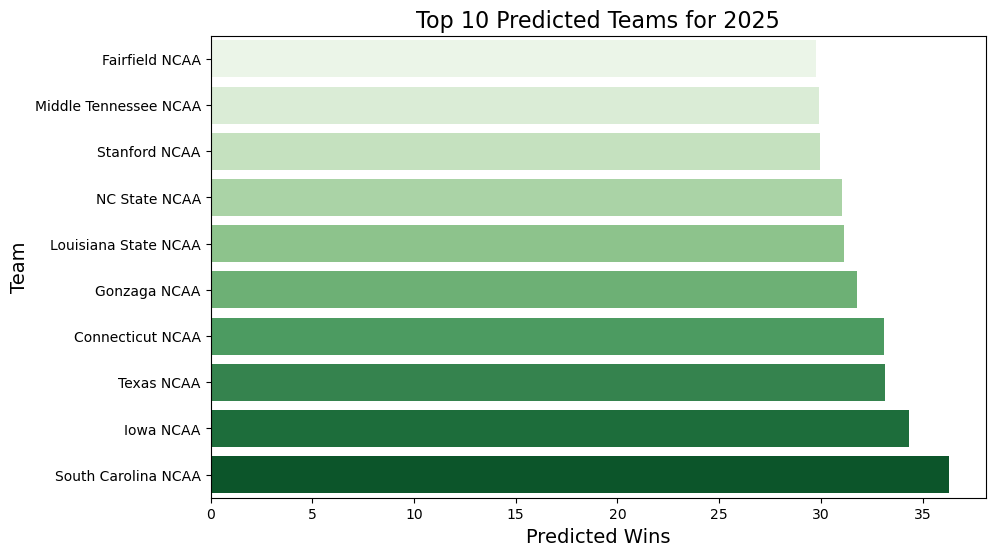

In [84]:
# Setting the style for plotting data
plt.figure(figsize=(10, 6))
sns.barplot(x="Predicted_Wins", y="School", data=top_10, palette="Greens_r")


# Add labels and title
plt.xlabel("Predicted Wins", fontsize=14)
plt.ylabel("Team", fontsize=14)
plt.title("Top 10 Predicted Teams for 2025", fontsize=16)
plt.gca().invert_yaxis()  # Invert Y-axis so the top team is at the top

# Show the plot
plt.show()

#### The graph and data show us the NCAAAW teams most likely to receive top 10 rankings with South Carolina at the top with over 35 wins and Fairfield bringing up the rear estinamted to record 30 wins in 2025.

# Running the March Madness 2025 Tourney Simluation

In [103]:
# Creating the March Madness prediction function
def predict_winner(team1, team2):
    prob_team1 = team1["Predicted_Win_Percentage"] / (
        team1["Predicted_Win_Percentage"] + team2["Predicted_Win_Percentage"]
    )
    return team1["School"] if np.random.rand() < prob_team1 else team2["School"]

# Example of predicted winner based on South Carolina vs Iowa
winner = predict_winner(df_sorted.iloc[0], df_sorted.iloc[1])
print(f"Predicted 2025 Champion: {winner}")

Predicted 2025 Champion: South Carolina NCAA


#### Running the simulation 10 times returns South Carolina as the predicted winners of the March Madness 2025 Tournament!